In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [21]:
df = pd.read_csv(r'C:\Users\MITHUN\Desktop\STUDIES\PROJECT\27.Credit card Fraud\Data & Requirement\credit_card_dataset.csv')

In [22]:
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64

In [23]:
df = df.drop('CUST_ID', axis=1)

In [24]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [25]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [26]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

In [27]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [28]:
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)


In [29]:
wcss = []
silhouette_scores = []
max_clusters = 10

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_df, labels))
    

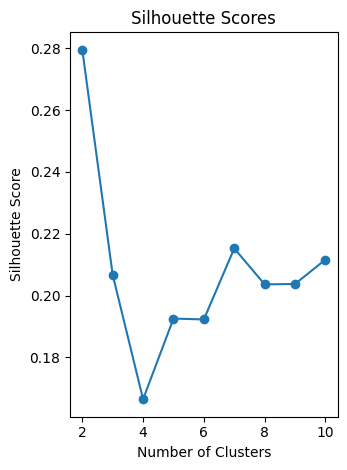

In [30]:
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'WCSS')

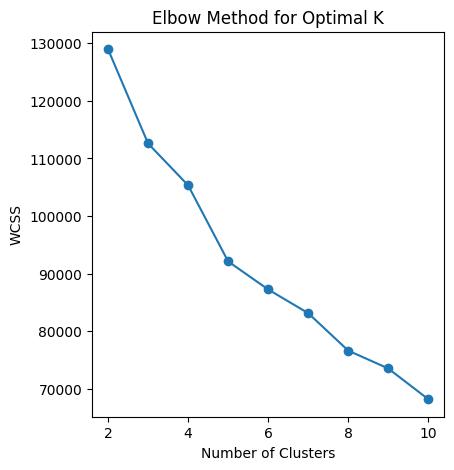

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [32]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

In [33]:
print("\nCluster Centers (Scaled):")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df.columns[:-1]))


Cluster Centers (Scaled):
       BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  5016.208682           0.967276   717.486544        451.159436   
1   108.430006           0.412096   350.247868        190.521089   
2  1253.817942           0.974758  2182.022178       1241.768493   
3  1495.728926           0.966290   283.314585        209.879822   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              266.431385   5065.972906             0.327821   
1              160.197189    299.482324             0.320591   
2              940.517248    234.564524             0.928413   
3               73.750392    784.828033             0.206974   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.160961                          0.219123   
1                    0.072760                          0.234912   
2                    0.390217                          0.748106   
3                    0.097973              

In [34]:
print("\nCluster Summary:")
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


Cluster Summary:
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5010.394668           0.966663   716.017789        450.235875   
1         108.430006           0.412096   350.247868        190.521089   
2        1253.817942           0.974758  2182.022178       1241.768493   
3        1495.324927           0.966467   283.482824        210.004454   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    265.885977   5065.974690             0.327150   
1                    160.197189    299.482324             0.320591   
2                    940.517248    234.564524             0.928413   
3                     73.794186    782.285268             0.207097   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                    

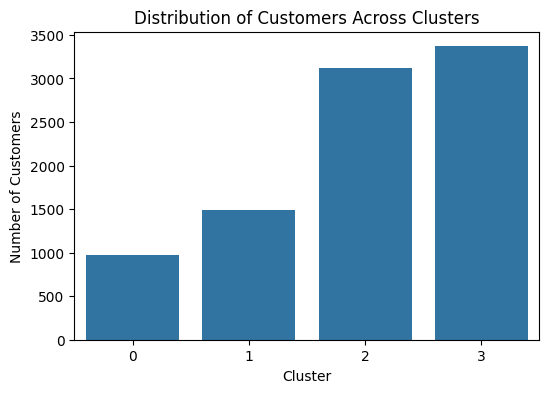

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

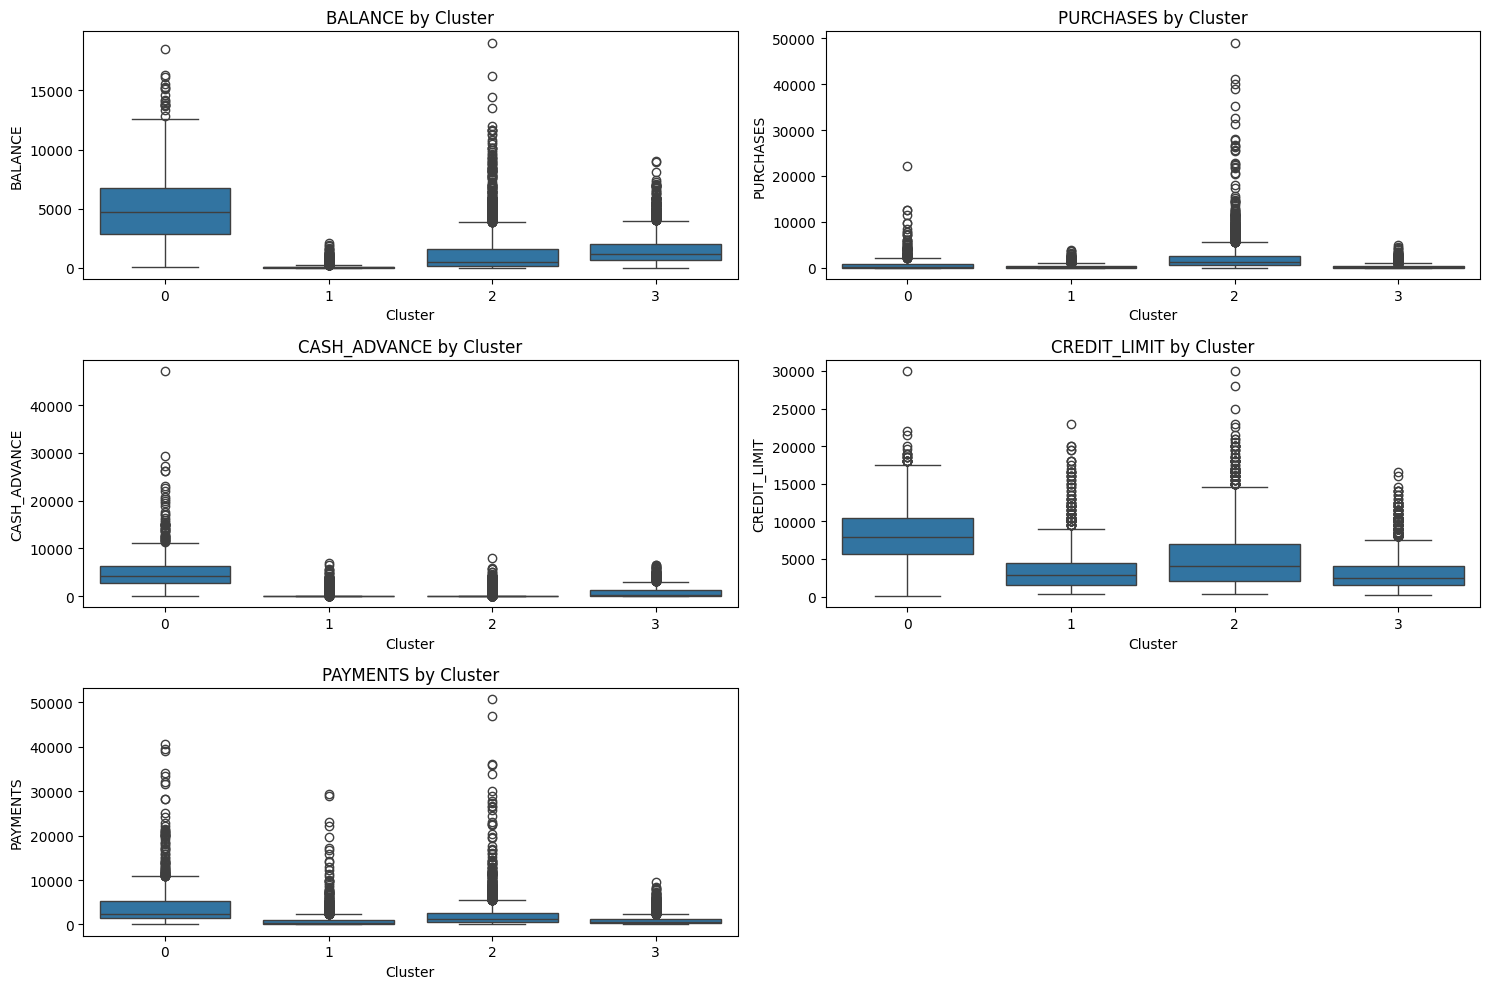

In [36]:
key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.show()

In [45]:
df.to_csv('credit_card_dataset_with_clusters.csv', index=False)
print("\nDataset with cluster labels saved as 'credit_card_dataset_with_clusters.csv'")



Dataset with cluster labels saved as 'credit_card_dataset_with_clusters.csv'


In [48]:
print("\nMarketing Strategy Insights:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = cluster_summary.loc[cluster]
    recommendations = []  # List to collect recommendations
    if cluster_data['BALANCE'] > cluster_summary['BALANCE'].mean():
        recommendations.append("- High balance customers: Offer credit limit increases or premium cards.")
    else:
        recommendations.append("- Lower balance customers: Promote balance transfer offers to attract more usage.")
    
    if cluster_data['PURCHASES'] > cluster_summary['PURCHASES'].mean():
        recommendations.append("- High purchase activity: Promote rewards programs or cashback offers.")
    else:
        recommendations.append("- Low purchase activity: Target with promotional discounts to boost spending.")
    
    if cluster_data['CASH_ADVANCE'] > cluster_summary['CASH_ADVANCE'].mean():
        recommendations.append("- Frequent cash advances: Offer lower interest rates or debt consolidation plans.")
    else:
        recommendations.append("- Low cash advance usage: Educate about cash advance benefits for emergencies.")
    
    if cluster_data['PURCHASES_FREQUENCY'] > cluster_summary['PURCHASES_FREQUENCY'].mean():
        recommendations.append("- Frequent purchasers: Target with loyalty programs or exclusive discounts.")
    else:
        recommendations.append("- Infrequent purchasers: Send reminders or incentives to increase card usage.")
    
    # Print recommendations or a default message if the list is empty (though it won't be now)
    if recommendations:
        for rec in recommendations:
            print(rec)
    else:
        print("- No specific recommendations: Consider general engagement campaigns.")


Marketing Strategy Insights:

Cluster 0:
- High balance customers: Offer credit limit increases or premium cards.
- Low purchase activity: Target with promotional discounts to boost spending.
- Frequent cash advances: Offer lower interest rates or debt consolidation plans.
- Infrequent purchasers: Send reminders or incentives to increase card usage.

Cluster 1:
- Lower balance customers: Promote balance transfer offers to attract more usage.
- Low purchase activity: Target with promotional discounts to boost spending.
- Low cash advance usage: Educate about cash advance benefits for emergencies.
- Infrequent purchasers: Send reminders or incentives to increase card usage.

Cluster 2:
- Lower balance customers: Promote balance transfer offers to attract more usage.
- High purchase activity: Promote rewards programs or cashback offers.
- Low cash advance usage: Educate about cash advance benefits for emergencies.
- Frequent purchasers: Target with loyalty programs or exclusive discounts

In [49]:
print("\nMarketing Strategy Insights:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = cluster_summary.loc[cluster]
    cluster_size = df[df['Cluster'] == cluster].shape[0]
    print(f"- Cluster Size: {cluster_size} customers ({cluster_size/len(df)*100:.1f}% of total)")
    
    if cluster_data['BALANCE'] > cluster_summary['BALANCE'].mean():
        print("- High balance customers: Offer credit limit increases or premium cards.")
    else:
        print("- Lower balance customers: Promote balance transfer offers to attract more usage.")
    
    if cluster_data['PURCHASES'] > cluster_summary['PURCHASES'].mean():
        print("- High purchase activity: Promote rewards programs or cashback offers.")
    else:
        print("- Low purchase activity: Target with promotional discounts to boost spending.")
    
    if cluster_data['CASH_ADVANCE'] > cluster_summary['CASH_ADVANCE'].mean():
        print("- Frequent cash advances: Offer lower interest rates or debt consolidation plans.")
    else:
        print("- Low cash advance usage: Educate about cash advance benefits for emergencies.")
    
    if cluster_data['PURCHASES_FREQUENCY'] > cluster_summary['PURCHASES_FREQUENCY'].mean():
        print("- Frequent purchasers: Target with loyalty programs or exclusive discounts.")
    else:
        print("- Infrequent purchasers: Send reminders or incentives to increase card usage.")
    
    if cluster_data['PRC_FULL_PAYMENT'] > cluster_summary['PRC_FULL_PAYMENT'].mean():
        print("- High full payment ratio: Market premium services or high-limit cards.")
    else:
        print("- Low full payment ratio: Offer payment plans or financial counseling.")
    
    if cluster_data['CREDIT_LIMIT'] > cluster_summary['CREDIT_LIMIT'].mean():
        print("- High credit limit customers: Cross-sell investment or insurance products.")
    else:
        print("- Lower credit limit customers: Gradually increase limits with responsible usage.")



Marketing Strategy Insights:

Cluster 0:
- Cluster Size: 977 customers (10.9% of total)
- High balance customers: Offer credit limit increases or premium cards.
- Low purchase activity: Target with promotional discounts to boost spending.
- Frequent cash advances: Offer lower interest rates or debt consolidation plans.
- Infrequent purchasers: Send reminders or incentives to increase card usage.
- Low full payment ratio: Offer payment plans or financial counseling.
- High credit limit customers: Cross-sell investment or insurance products.

Cluster 1:
- Cluster Size: 1487 customers (16.6% of total)
- Lower balance customers: Promote balance transfer offers to attract more usage.
- Low purchase activity: Target with promotional discounts to boost spending.
- Low cash advance usage: Educate about cash advance benefits for emergencies.
- Infrequent purchasers: Send reminders or incentives to increase card usage.
- High full payment ratio: Market premium services or high-limit cards.
- Lo

In [50]:

df.to_csv('credit_card_dataset_with_clusters.csv', index=False)
print("\nDataset with cluster labels saved as 'credit_card_dataset_with_clusters.csv'")


Dataset with cluster labels saved as 'credit_card_dataset_with_clusters.csv'
